# To Do: done!
* download actual pic for the website

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cosmos.v1.3.8_neshini.cat',delimiter='\s+',memory_map=True)

In [63]:
st = pd.read_csv('Straatmen_2016_Table3.txt', delimiter=' ')

In [185]:
agn = pd.read_csv('cosmos.v1.3.6.agn.v0.5_neshini.cat', delimiter='\s+', skiprows = 3, memory_map=True)

In [191]:
sfr = pd.read_csv('cosmos.v1.3.6.sfr.v0.4_neshini.cat', delimiter='\s+', memory_map=True)

In [5]:
df.query('id < 100')

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,wmin_jhk,wmin_hst,wmin_irac,wmin_all,star,nearstar,use,snr,use_nosnr,z_spec
0,1,2825.045,48.504,150.128601,2.174722,0,6.0,0.321644,0.110580,1.646582,...,1.09,0.0,1.04,0.60,0,0,0,4.354714,0,-99.0
1,2,2056.510,49.244,150.160645,2.174749,0,14.0,0.535205,0.115497,1.391211,...,1.11,0.0,0.94,0.55,0,0,0,5.001919,0,-99.0
2,3,2972.610,51.087,150.122452,2.174830,0,10.0,0.500944,0.107069,1.416701,...,1.09,0.0,0.79,0.64,0,0,0,4.630170,0,-99.0
3,4,4207.035,51.665,150.070969,2.174860,0,18.0,0.618443,0.118782,1.235780,...,1.06,0.0,0.90,0.52,1,0,0,4.740365,0,-99.0
4,5,1371.338,47.309,150.189209,2.174664,0,39.0,1.036439,0.119941,1.223002,...,1.14,0.0,1.00,0.51,1,0,0,9.145858,0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,942.984,102.015,150.207062,2.176940,1,7.0,0.479498,0.111513,1.457029,...,1.16,0.0,0.93,0.59,0,0,0,4.117961,0,-99.0
95,96,1610.592,60.106,150.179230,2.175199,3,222.0,5.151099,0.117656,1.096310,...,1.13,0.0,1.00,0.53,0,0,0,41.351430,0,-99.0
96,97,5075.414,90.604,150.034775,2.176484,0,41.0,1.113392,0.171310,1.162625,...,0.50,0.0,0.86,0.25,0,0,0,6.006368,0,-99.0
97,98,3285.185,97.773,150.109405,2.176777,0,21.0,0.627225,0.115497,1.646582,...,1.10,0.0,0.97,0.55,0,0,0,5.200056,0,-99.0


The C1284 points shows the galaxy with the id 1285
Signal to Noise of F160W 172.70798269148517


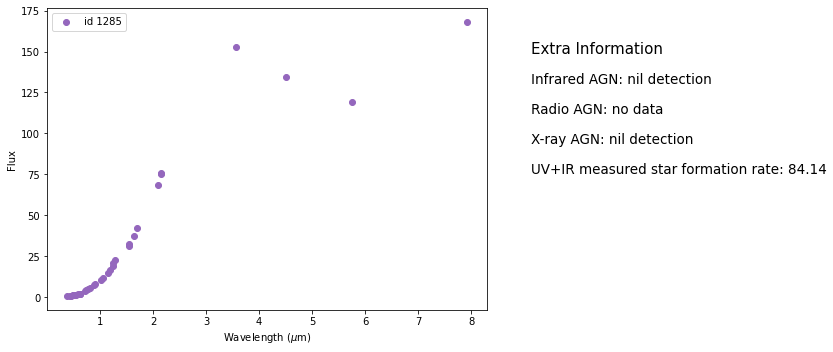

In [277]:
#ONE galaxy graphed + info 
plt.figure(figsize=(12,5))
gala = list(range( 1284,1285))
k = 1
for k in gala:
    if df.loc[k,'star'] == 0:
        print("The", 'C%s' %k, "points shows the galaxy with the id", df.id[k])
        
        plt.text(1.1, 0.85, "Extra Information",fontsize=15, transform = plt.gca().transAxes)
        ab =['no data','positive detection']
        ab[-1] = 'nil detection'
        y, z = 0.75, .1
        plt.text(1.1, y, "Infrared AGN: %s"%ab[agn.ir_agn[k]], fontsize=13.5, transform = plt.gca().transAxes)
        plt.text(1.1, y-z, "Radio AGN: %s"%ab[agn.radio_agn[k]], fontsize=13.5, transform = plt.gca().transAxes)
        plt.text(1.1, y-z*2, "X-ray AGN: %s"%ab[agn.xray_agn[k]], fontsize=13.5, transform = plt.gca().transAxes)
        plt.text(1.1, y-z*3, "UV+IR measured star formation rate: %s"% sfr.SFR_UVIR[k], fontsize=13.5, transform = plt.gca().transAxes)
        
        i=0
        plt.xlabel('Wavelength ($\mu$m)')
        plt.ylabel('Flux')
        while i< len(st):
            F = 'f_' + st.loc[i, 'Filter']
            E = 'e_' + st.loc[i, 'Filter']
            if df.loc[k, F] >= 0:
                if st.loc[i, 'Filter'] == 'F160W':
                    signo =  df.loc[k,F]/df.loc[k,E]
                    print("Signal to Noise of", st.loc[i, 'Filter'], signo)
                #plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k)
                if i == 0:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k, label= 'id %s' %df.id[k])
                else:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k)
            i+=1   
    else:
        print ("This is a star with the id", k)
        print(' ')
plt.legend() 
plt.tight_layout()
plt.show()
plt.close()

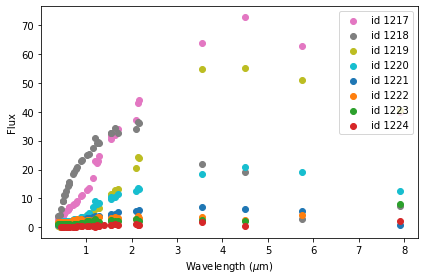

In [286]:
#MULTIPLE galaxies graphed
plt.figure()
gala = list(range( 1216,1224))
k = 1
for k in gala:
    if df.loc[k,'star'] == 0:
        i=0
        plt.xlabel('Wavelength ($\mu$m)')
        plt.ylabel('Flux')
        while i< len(st):
            F = 'f_' + st.loc[i, 'Filter']
            E = 'e_' + st.loc[i, 'Filter']
            if df.loc[k, F] >= 0:
                if i == 0:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k, label= 'id %s' %df.id[k])
                else:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k)
            i+=1   
    else:
        print ("id ",k, "cannot be plotted because it is a star")
        print(' ')
plt.legend() 
plt.tight_layout()
plt.show()
plt.close()

The C1284 points shows the galaxy with the id 1285
Infrared AGN: nil detection
Radio AGN: no data
X-ray AGN: nil detection
UV+IR measured star formation rate: 84.14
Signal to Noise of F160W 172.70798269148517
 
The C1131 points shows the galaxy with the id 1132
Infrared AGN: no data
Radio AGN: no data
X-ray AGN: nil detection
UV+IR measured star formation rate: 25740.0
Signal to Noise of F160W 107.71921986482674
 
The C11799 points shows the galaxy with the id 11800
Infrared AGN: no data
Radio AGN: nil detection
X-ray AGN: nil detection
UV+IR measured star formation rate: 10.5
Signal to Noise of F160W 22.372099611363417
 


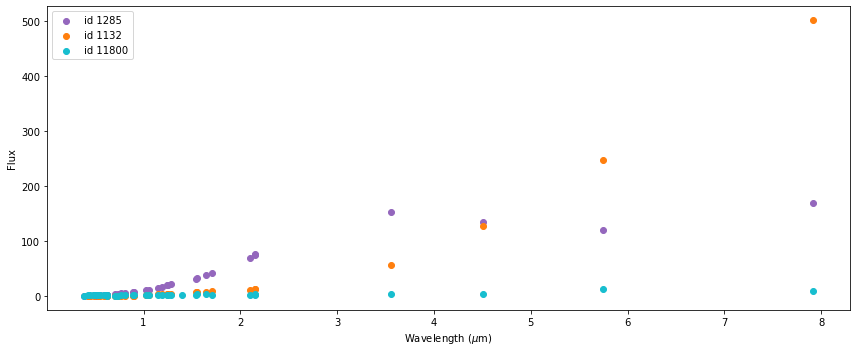

In [314]:
#Special galaxies graphed + info
# find non negative examples of UV+IR (1285)
#find a high star formation rate and plot (1132)
#find a source with a good z spec (not -99) (15472)
plt.figure(figsize=(12,5))
gala = [1284, 1131, 11799]
k = 1
for k in gala:
    if df.loc[k,'star'] == 0:
        print("The", 'C%s' %k, "points shows the galaxy with the id", df.id[k])
        
        ab =['no data','positive detection']
        ab[-1] = 'nil detection'
        y, z = 0.75, .1
        print ("Infrared AGN: %s"%ab[agn.ir_agn[k]])
        print("Radio AGN: %s"%ab[agn.radio_agn[k]])
        print("X-ray AGN: %s"%ab[agn.xray_agn[k]])
        print("UV+IR measured star formation rate: %s"% sfr.SFR_UVIR[k])
        i=0
        plt.xlabel('Wavelength ($\mu$m)')
        plt.ylabel('Flux')
        while i< len(st):
            F = 'f_' + st.loc[i, 'Filter']
            E = 'e_' + st.loc[i, 'Filter']
            if df.loc[k, F] >= 0:
                if st.loc[i, 'Filter'] == 'F160W':
                    signo =  df.loc[k,F]/df.loc[k,E]
                    print("Signal to Noise of", st.loc[i, 'Filter'], signo)
                    print(' ')
                #plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k)
                if i == 0:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k, label= 'id %s' %df.id[k])
                else:
                    plt.scatter(st.loc[i,'Lambda_c'],df.loc[k, F], c = 'C%s' %k)
            i+=1   
    else:
        print ("This is a star with the id", k)
        print(' ')
plt.legend() 
plt.tight_layout()
plt.show()
plt.close()